In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [9]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_C_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,NaN,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [10]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	2
float64		column 2	2
float64		column 3	4
float64		column 4	4
float64		column 5	3
float64		column 6	1
float64		column 7	1
float64		column 8	1
float64		column 9	1


In [11]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,212.000000,212.000000,210.000000,210.000000,211.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518381,13.418585,2.701095,1.448619,72.643697,0.496948,8.959108,0.175869,0.056808
std,0.003047,0.809936,1.429175,0.500029,0.777580,0.653726,1.426159,0.498245,0.097623
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516528,12.922500,2.192500,1.190000,72.270000,0.120000,8.240000,0.000000,0.000000
50%,1.517685,13.305000,3.480000,1.360000,72.780000,0.560000,8.600000,0.000000,0.000000
75%,1.519165,13.840000,3.600000,1.630000,73.080000,0.610000,9.180000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

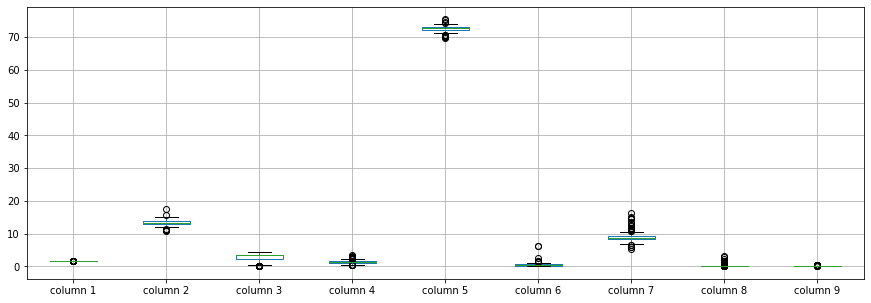

In [12]:
df.boxplot(return_type='axes', figsize=(15,5))

In [13]:
df.mean()

column 1     1.518381
column 2    13.418585
column 3     2.701095
column 4     1.448619
column 5    72.643697
column 6     0.496948
column 7     8.959108
column 8     0.175869
column 9     0.056808
dtype: float64

In [14]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.184516,-0.134115,-0.419714,-0.540638,-0.289937,0.810185,-0.003506,0.137409
column 2,-0.184516,1.000000,-0.281912,0.163128,-0.071623,-0.269493,-0.265226,0.325871,-0.254597
column 3,-0.134115,-0.281912,1.000000,-0.498501,-0.143985,0.006774,-0.443214,-0.501944,0.076693
column 4,-0.419714,0.163128,-0.498501,1.000000,0.009854,0.324666,-0.258416,0.481695,-0.075042
column 5,-0.540638,-0.071623,-0.143985,0.009854,1.000000,-0.192553,-0.205222,-0.104157,-0.086797
column 6,-0.289937,-0.269493,0.006774,0.324666,-0.192553,1.000000,-0.317742,-0.042124,-0.006125
column 7,0.810185,-0.265226,-0.443214,-0.258416,-0.205222,-0.317742,1.000000,-0.114646,0.123122
column 8,-0.003506,0.325871,-0.501944,0.481695,-0.104157,-0.042124,-0.114646,1.000000,-0.057467
column 9,0.137409,-0.254597,0.076693,-0.075042,-0.086797,-0.006125,0.123122,-0.057467,1.000000


In [15]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [16]:
imputer = md.Midas(layer_structure = [9,9+30,9+30+30,9+30+30+30,9+30+30+30+30,9+30+30+30+30+30,9+30+30+30+30+30+30,9+30+30+30+30+30,9+30+30+30+30,9+30+30+30,9+30+30,9+30,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 101.18929173396184
Epoch: 1 , loss: 101.19066561185397
Epoch: 2 , loss: 101.15054673414964
Epoch: 3 , loss: 101.18992849496695
Epoch: 4 , loss: 101.07584615854117
Epoch: 5 , loss: 101.19277249849759
Epoch: 6 , loss: 101.09030210054837
Epoch: 7 , loss: 101.07697589580829
Epoch: 8 , loss: 101.08320030799278
Epoch: 9 , loss: 101.06556232158954
Epoch: 10 , loss: 101.00055988018329
Epoch: 11 , loss: 101.37911869929387
Epoch: 12 , loss: 101.03007448636569
Epoch: 13 , loss: 101.02599393404446
Epoch: 14 , loss: 100.98742441030649
Epoch: 15 , loss: 101.0280755849985
Epoch: 16 , loss: 101.02527970534105
Epoch: 17 , loss: 101.02093623234676
Epoch: 18 , loss: 101.07473520132211
Epoch: 19 , loss: 100.96765547532301
Epoch: 20 , loss: 101.10522754375751
Epoch: 21 , loss: 101.03678013728215
Epoch: 22 , loss: 101.06045825664813
Epoch: 23 , loss: 101.0139870276818
Epoch: 24 , loss: 101.0406740628756
Epoch: 25 , loss: 100

In [17]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [18]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [20]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [21]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,-72.904034,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
210,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
211,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [22]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [23]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [24]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(128.01141882661062, 1090.4359815890969)

In [25]:
NRMS=numerator/denominator
NRMS


0.1173947127460514

In [26]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [27]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.780000,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.730000,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.990000,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.610000,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,0.175966,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.610000,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.060000,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.420000,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.610000,0.00,8.48,1.57,0.0


In [28]:
imputations[-1].to_excel("Glass_C_1(imp).xlsx", index=False, header=False)